주어진 데이터셋을 차원 축소한 뒤 **다양한 알고리즘**을 적용하여 클러스터링을 진행하고, 결과를 시각화하는 작업을 직접 해보면서 **비지도학습** (Unsupervised Learning)에 대한 이해도를 높여 봅시다.

In [1]:
## 필요한 라이브러리를 임포트합니다.

import pandas as pd
import numpy as np

In [2]:
## 시각화 관련 라이브러리를 임포트합니다.

from matplotlib import pyplot as plt
import seaborn as sns

###데이터

사용할 데이터: 'Marketing Campaign.csv'

주어진 데이터는 마케팅 캠페인을 펼치고자 하는 소비자들에 대한 정보를 나타낸 데이터입니다. 해당 소비자들을 알맞게 군집화시키는 것이 우리의 목적입니다.

총 29개의 column으로 구성되어 있습니다. 



---







데이터에 대한 자세한 설명은 해당 kaggle 페이지에서 확인하실 수 있습니다.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

데이터를 불러옵니다.

In [3]:
## drive에 있는 데이터셋을 불러오기 위해 드라이브와 연동을 합니다.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
## 'Marketing_campaign' 데이터의 위치를 불러와 저장합니다.

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/7주차/[0209] Clustering 실습 및 과제 자료/marketing_campaign.csv', \
                   sep = ';')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


### 데이터 전처리

In [9]:
## 등록한 이후에 현재까지의 기간(회원 일수)를 'days'라는 변수로 저장.
from datetime import datetime
y = pd.to_datetime(datetime.today().strftime("%Y-%m-%d")) #datetime 타입으로 변환

data.Dt_Customer = pd.to_datetime(data.Dt_Customer) #datetime 타입으로 변환
data['days'] = y - data.Dt_Customer
data['days'] = data['days'] / np.timedelta64(1, 'D')
data['days'] = data['days'].astype(int) #int형으로 변환
data['days'][:5]

0    3814
1    3264
2    3463
3    3290
4    3312
Name: days, dtype: int64

In [10]:
## 나이를 age에 저장
data['age'] = 2023-data['Year_Birth']+1

In [13]:
## 마케팅 캠페인에서의 총 참여 횟수
data['CampaignAttendance'] = data.iloc[:,20:25].sum(axis=1)

## 이 데이터랑 군집화 결과가 얼마나 유사하게, 또는 다르게 나오는지 비교해봅시다~!!

In [114]:
data['CampaignAttendance'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: CampaignAttendance, dtype: int64

In [16]:
data.columns

features = ['days', 'age', 'Income', 'Recency', 'MntWines', 'MntFruits',\
                     'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',\
                     'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', \
                     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',\
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',\
                    'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','CampaignAttendance'] #우리가 고려할 변수들

In [17]:
X_features = data[features]
X_features = X_features.dropna().reset_index(drop = True) #결측치 제거

y_label = X_features['CampaignAttendance'] #캠페인에서의 총 참여 횟수를 임의의 라벨값으로 설정 -> 기준으로 삼아보자.

X_features = X_features.drop(['CampaignAttendance'], axis = 1)

In [18]:
## 각 변수들을 '표준화' scaling 합니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_features_scaling  = scaler.fit_transform(X_features)

X_features_scaling = pd.DataFrame(X_features_scaling, columns = X_features.columns, index = list(X_features.index.values))

###차원 축소

데이터를 차원 축소 해봅시다.

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## LDA
lda = LinearDiscriminantAnalysis(n_components = 2)
X_train_lda = lda.fit_transform(X_features_scaling, y_label) #차원축소 과정에 y 라벨값을 입력해줌

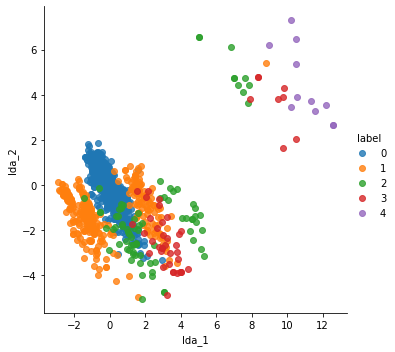

In [21]:
X_train_lda = pd.DataFrame(X_train_lda).loc[:,0:1]
X_train_lda = pd.concat((X_train_lda, y_label), axis = 1) #X_train_Ida와 y_label 데이터를 하나로 합치기
X_train_lda.columns = ['lda_1', 'lda_2', 'label']
X_train_lda

sns.lmplot(x = 'lda_1',y = 'lda_2',data = X_train_lda, hue = 'label', fit_reg = False)
plt.show()

## 우리가 원하는 정답 모양
## 캠페인 참여에서의 총 참여 횟수를 라벨값으로 둔 상태에서의 데이터 분포도

###K-means Clustering

클러스터링을 돌려 보는 데에 의의가 있기에, 파라미터 값 최적화보다는 각 알고리즘을 사용하면 결과가 어떻게 달라지는 지에 초점을 맞추어 살펴봅니다. 여러 번 시행해보면서 **자유롭게 파라미터를 정해주세요**.

**(직접 최적의 파라미터 값을 찾아서 설정하고 싶으시다면 훨씬 좋습니다! 해당 과제의 모든 코드는 기본 뼈대일 뿐입니다. 코드를 추가 또는 변경하셔도 좋습니다.)**

다른 x값들에 대해서도 캠페인 참여도, 즉 고객의 충실도를 잘 군집화할 수 있을까요? 클러스터링으로 결과를 확인해봅시다.



---





K-means를 이용하여 클러스터링 해봅시다.

In [22]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import KMeans

In [23]:
from yellowbrick.cluster import KElbowVisualizer

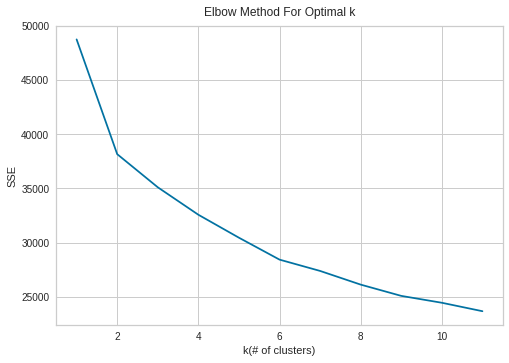

In [29]:
sse = []
K = range(1, 12)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(X_features_scaling)
  sse.append(km.inertia_)

plt.plot(K, sse)
plt.xlabel('k(# of clusters)')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k', pad = 10)
plt.show()

- k=2, k=6에서 크게 꺽이는 순간이 존재
- 실루엣 계수 비교해보기

In [26]:
model = KMeans()

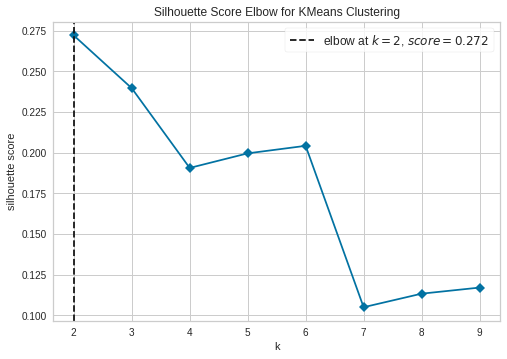

In [30]:
elbowvisualizer = KElbowVisualizer(model, k = (2,10), metric = 'silhouette', timings = False)

elbowvisualizer.fit(X_features_scaling)  
elbowvisualizer.show()

- k=2에서 elbow point로 나타남
- k=3, k=6도 각각 넣어서 코드 돌려보기

In [66]:
## 클러스터 수는 2로 설정하고, KMeans를 활용하여 예측된 y값을 만들어 봅시다.

km = KMeans(n_clusters = 2)

y_km = km.fit_predict(X_features_scaling)
y_km

array([0, 1, 0, ..., 0, 0, 1], dtype=int32)

In [67]:
X_train_lda['K_means'] = y_km

In [54]:
## 클러스터 수는 3으로 설정하고, KMeans를 활용하여 예측된 y값을 만들어 봅시다.

km = KMeans(n_clusters = 3)

y_km = km.fit_predict(X_features_scaling)
y_km

X_train_lda['K_means'] = y_km

In [40]:
## 클러스터 수는 6으로 설정하고, KMeans를 활용하여 예측된 y값을 만들어 봅시다.

km = KMeans(n_clusters = 6)

y_km = km.fit_predict(X_features_scaling)
y_km

X_train_lda['K_means'] = y_km

####시각화

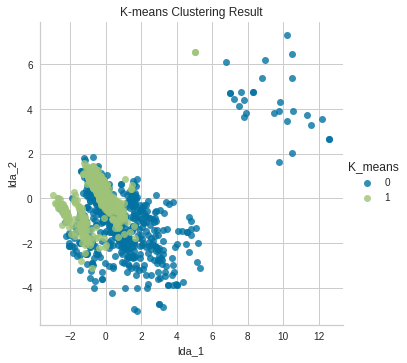

In [68]:
# k=2일 경우
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'K_means', fit_reg = False)
plt.title('K-means Clustering Result')
plt.show()

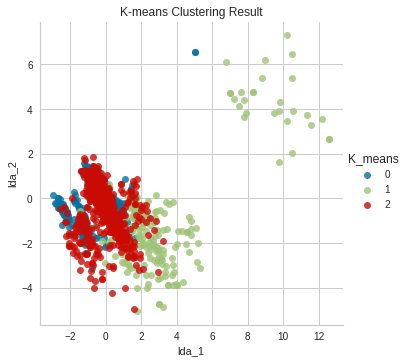

In [55]:
# k=3일 경우
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'K_means', fit_reg = False)
plt.title('K-means Clustering Result')
plt.show()

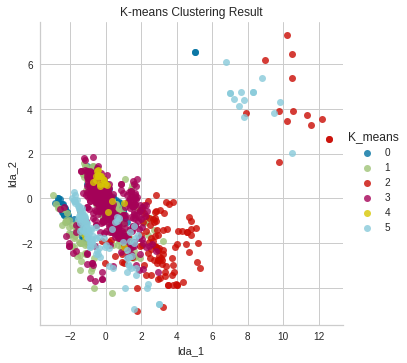

In [41]:
# k=6일 경우
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'K_means', fit_reg = False)
plt.title('K-means Clustering Result')
plt.show()

# 너무 과함

- k=3으로 진행

###Hierarchical Clustering

Agglomerative 방법을 이용하여 클러스터링 해봅시다.

In [56]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import AgglomerativeClustering

In [75]:
## 클러스터 수는 3으로 설정하고, Agglomerative를 활용하여 예측된 y값을 만들어 봅시다.

agghc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') #와드연결법을 사용합니다.

y_agghc = agghc.fit_predict(X_features_scaling)
y_agghc

array([2, 0, 2, ..., 0, 2, 0])

In [76]:
X_train_lda['hierarchical'] = y_agghc

####시각화

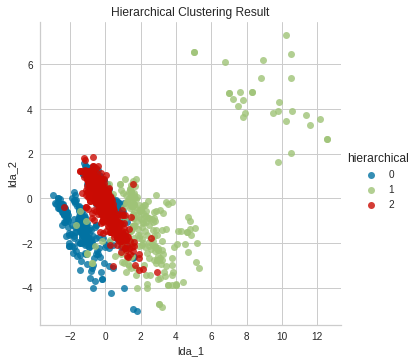

In [77]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'hierarchical', fit_reg = False)
plt.title('Hierarchical Clustering Result')
plt.show()

###DBSCAN

DBSCAN을 이용하여 클러스터링 해봅시다.

In [80]:
## 필요한 라이브러리를 임포트합니다.

from sklearn.cluster import DBSCAN
import sklearn.utils
import sklearn.neighbors
from sklearn.neighbors import NearestNeighbors

In [82]:
nb = NearestNeighbors(n_neighbors = 4).fit(X_features_scaling)
minPts = 4
distances, indices = nb.kneighbors(X_features_scaling)

In [84]:
print(distances, indices, sep='\n')

[[1.19209290e-07 3.34668520e+00 3.52977034e+00 3.53985459e+00]
 [0.00000000e+00 9.09903423e-01 9.39336054e-01 9.58490843e-01]
 [0.00000000e+00 1.63108673e+00 1.92351889e+00 2.01634054e+00]
 ...
 [0.00000000e+00 2.85466117e+00 3.02415529e+00 3.27335510e+00]
 [0.00000000e+00 1.42852458e+00 1.70955064e+00 1.75579970e+00]
 [0.00000000e+00 1.14949383e+00 1.40752549e+00 1.54215594e+00]]
[[   0 1177 1911 2137]
 [   1 1869 1615 1563]
 [   2  549 1107 1390]
 ...
 [2213 1630 1236 1262]
 [2214 1107 1550 1390]
 [2215 1569 1392 1946]]


In [121]:
## eps는 0.1, minPts는 3로 설정한 뒤 DBSCAN를 활용하여 예측된 y값을 만들어 봅시다.

dbscan = DBSCAN(eps = 0.1, min_samples = 3, metric = 'euclidean') #eps는 0-1

y_dbscan = dbscan.fit(X_features_scaling)
y_dbscan
# eps는 적당히 코드를 돌려보면서 적절한 값으로 선택하여 사용

DBSCAN(eps=0.1, min_samples=3)

In [122]:
X_train_lda['dbscan'] = y_dbscan

In [123]:
cluster_db = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
cluster_db

6

In [130]:
y_db=dbscan.labels_

####시각화

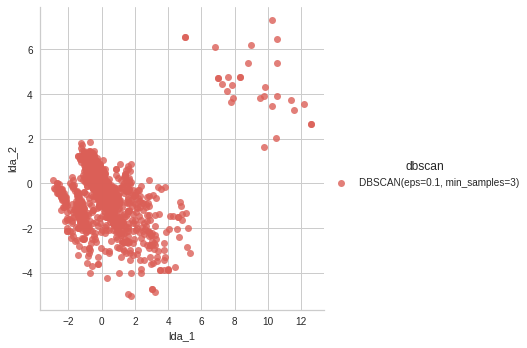

In [124]:
sns.lmplot(x = 'lda_1', y = 'lda_2', data = X_train_lda, hue = 'dbscan', fit_reg = False,
           palette = sns.color_palette('hls', np.unique(dbscan.labels_).shape[0]))
plt.show()

###Validation

실루엣 계수를 사용하여 각 클러스터링의 성능을 평가해봅시다.



---



(Q) 실루엣 계수로 평가하기 전에, 육안 상으로 어떠한 알고리즘의 성능이 제일 높아 보이며 어떠한 알고리즘의 성능이 제일 낮아 보이는지 의견을 적어주세요.

- Hierarchical Clustering를 이용한 경우가 알고리즘의 성능이 가장 높아보이고, DBSCAN을 이용한 경우 알고리즘의 성능이 가장 낮아보인다.
- K-means Clustering의 경우는 k=3으로 설정한 경우에 Hierarchical Clustering과 유사하다.



---



이제 실루엣 계수로 성능을 평가해 봅시다!

In [125]:
## 필요한 라이브러리를 임포트합니다.

import sklearn.metrics as metrics
from sklearn.metrics.cluster import silhouette_score

K-means Clustering의 실루엣 계수입니다.

In [126]:
coef_km = metrics.silhouette_score(X_features_scaling, y_km)
print('Silhouette score is {}.'.format(coef_km))

Silhouette score is 0.2720303244969593.


Hierarchical Clustering의 실루엣 계수입니다.

In [127]:
## Hierarchical Clustering

coef_hc = metrics.silhouette_score(X_features_scaling, y_agghc)
print('Silhouette score is {}.'.format(coef_hc))

Silhouette score is 0.21288254462011363.


DBSCAN의 실루엣 계수입니다.

In [131]:
## DBSCAN

coef_db = metrics.silhouette_score(X_features_scaling, y_db)
print('Silhouette score is {}.'.format(coef_db))

Silhouette score is -0.3544157747163334.


(Q) 실루엣 계수를 기반으로, 클러스터링 알고리즘의 성능을 높은 순대로 적어주세요.

- 실수엣 계수가 큰 순서대로: K-means Clustering > Hierarchical Clustering > DBSCAN

(Q) 클러스터링 결과에 대한 해석을 적어주세요. (참고로, 실루엣 계수는 -1에서 1 사이의 값을 가집니다.)

- 클러스터링 결과, K-means Clustering과 Hierarchical Clustering은 거의 비슷한 실수엣 계수를 가진다. 음수값이 나타나지는 않지만, 실루엣 계수가 1에 가깝게 나타나지는 않는 것으로 보아, 클러스터링이 잘 이루어지는 것은 아니라고 볼 수 있다.
- DBSCAN의 경우, 실루엣 계수가 음수로 나타났고, 클러스터링이 다른 두 알고리즘보다 더 잘 이루어지지 않았다고 해석할 수 있다.
- 세 경우 모두 실루엣 계수가 0.5 미만이므로 클러스터링이 잘 일어났다고 할 수 없다.


(Q) 마케팅 캠페인과 관련하여 도출할 수 있는 인사이트를 적어주세요.

- 여러 방식으로 클러스터링을 진행해본 결과, 마케팅 캠페인에 참여고자 하는 소비자들의 정보를 기반으로 클러스터링이 잘 이루어지지 않는다는 것을 확인할 수 있었다.
- 마케팅 캠페인을 펼치는 소비자들에게서 공통적인 혹은 특징적인 요인이 없었다고 해석할 수 있고, 이를 근거로 마케팅 캠페인은 특정 집단을 타겟으로 진행하기 보다는 여러 사람들이 공통적으로 참여할 수 있게끔 일반화된 방식으로 진행될 필요가 있다고 할 수 있다.
- 또는, 마케팅 캠페인에 참여하고자 하는 소비자의 특성이 다양하다고 해석할 수도 있는데, 오히려 그 다양성을 생각해본다면 마케팅이 소비자가 직접 커스터마이징 하거나 스스로 다양한 조합을 생성할 수 있는 방향으로 진행되어야 할 것이라고 생각한다.